# Reproducing Some `weightwatcher` Results Locally

I've always personally thought that some of the results driving the development of the [`weightwatcher`](https://weightwatcher.ai/) library to be fascinating. I understand that they have several papers and explain what they do on their website, but I want to re-confirm one of their core observations, without double-checking to make sure it's true first.

Critically, I faintly recall the claim that the linear layers of trained neural networks have power law distributed singular values, as opposed to values that would be expected of random matrices and derived from random matrix theory (RMT).

I want to see if my recollection is correct, and so:

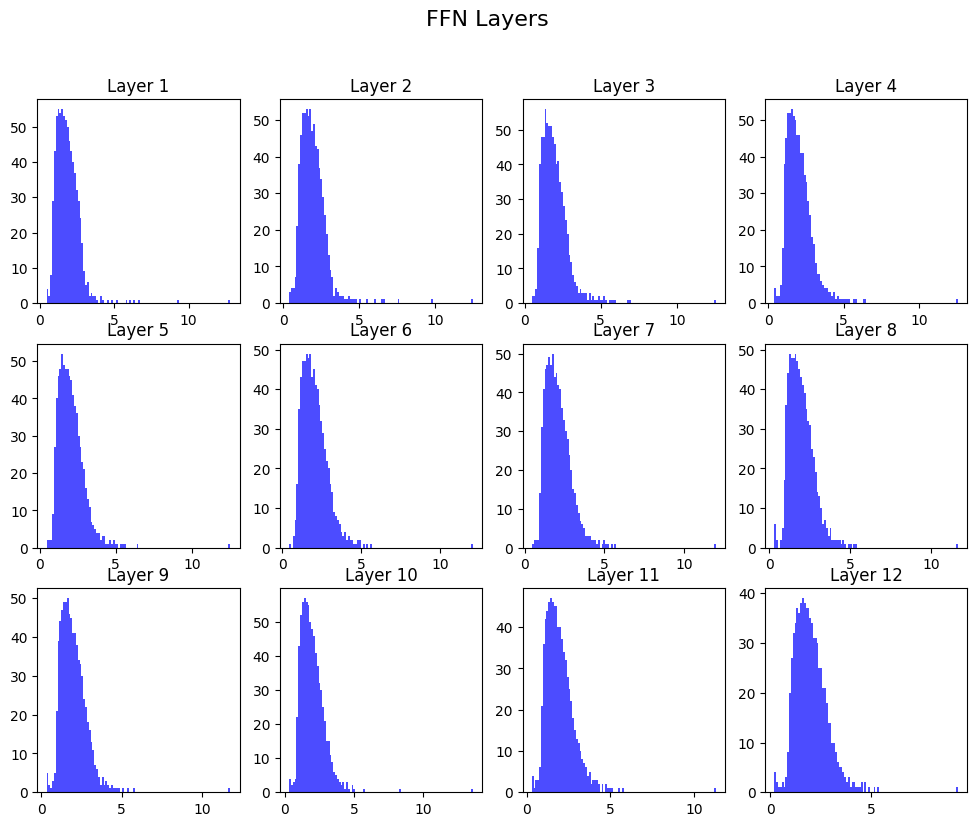

In [37]:
import matplotlib.pyplot as plt
import torch
from transformers import AutoModel

bert = AutoModel.from_pretrained("bert-base-uncased")

svds = [ layer.intermediate.dense.weight.svd().S.detach().numpy() for layer in bert.encoder.layer ]

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
for i, ax in enumerate(axes.flatten()):
    ax.hist(svds[i], bins=100, color="blue", alpha=0.7)
    ax.set_title(f"Layer {i+1}")

plt.suptitle("FFN Layers", fontsize=16);

And for attention components:

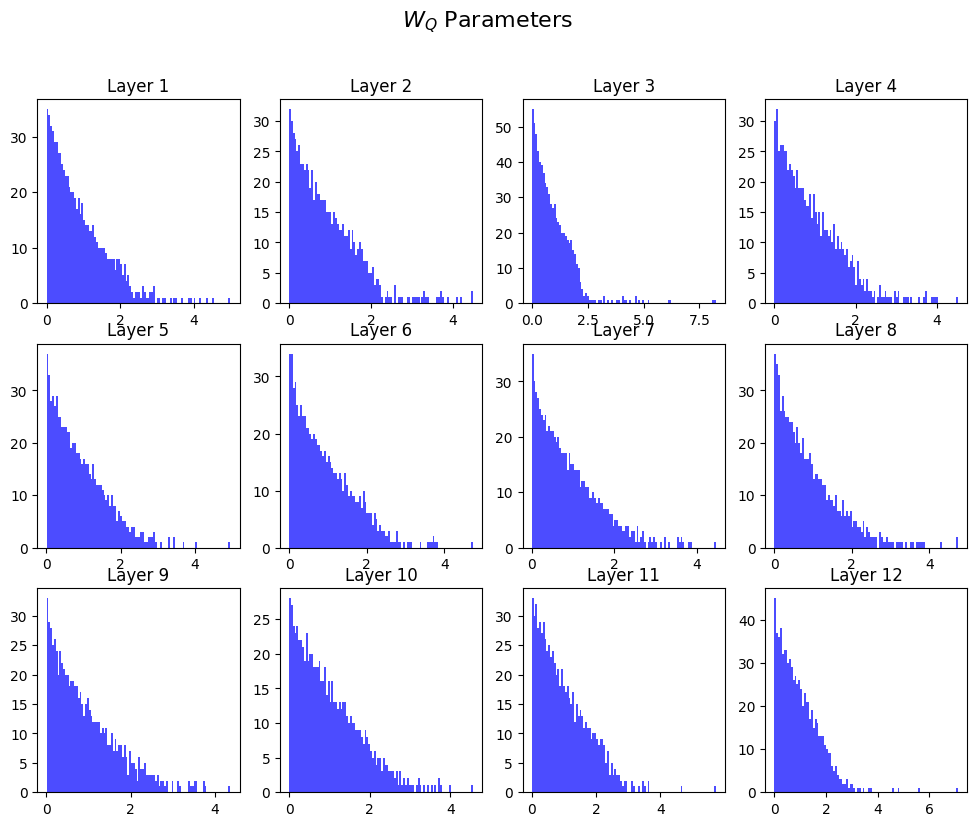

In [50]:
Q_svds = [ layer.attention.self.query.weight.svd().S.detach().numpy() for layer in bert.encoder.layer ]

fig, axes = plt.subplots(3, 4, figsize=(12, 9))

for i, ax in enumerate(axes.flatten()):
    ax.hist(Q_svds[i], bins=100, color='blue', alpha=0.7)
    ax.set_title(f'Layer {i+1}')
plt.suptitle("$W_Q$ Parameters", fontsize=16);

Interesting! It seems like there is a qualitiative difference between the spectral density of the $W_Q$ parameters and their FFN counterparts. Granted, they are different sizes, but still, we can see interesting differences in their distributions.

What do the singular values of a Gaussian random matrix of the same size look like?

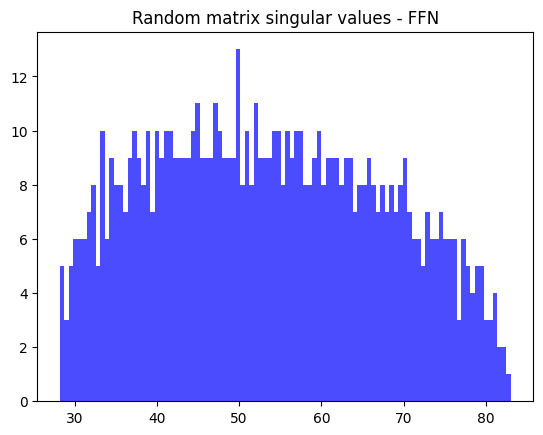

In [52]:
plt.title("Random matrix singular values - FFN")
plt.hist(torch.randn_like(bert.encoder.layer[0].intermediate.dense.weight).svd().S, color="blue", alpha=0.7, bins=100);

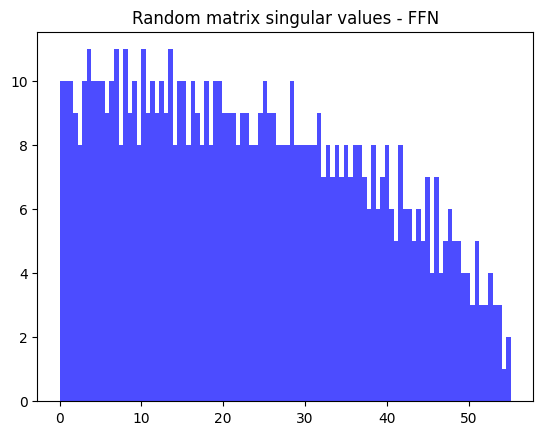

In [58]:
plt.title("Random matrix singular values - FFN");
plt.hist(torch.randn_like(bert.encoder.layer[0].attention.self.query.weight).svd().S, color="blue", alpha=0.7, bins=100);

It seems qualitatively different from the trained matrix results.

Overall, this kind of thing begs to be explored more, and I'm sure the [`weightwatcher`](https://weightwatcher.ai/) have and are going to do so. I just wish it was discussed more frequently.